In [43]:
import pandas as pd
import numpy as np

dataset_path = "../dataset/mlcourse-dota2-win-prediction/train_features.csv"

In [60]:
df = pd.read_csv(dataset_path)

print(df.columns)

print(np.unique(df["game_mode"]))
print(len(df["game_mode"]))
print(len(df[df["game_mode"]==22]))
df_22 = df[df["game_mode"]==22]
print(len(df[df["game_mode"]==2]))
df_2 = df[df["game_mode"]==2]

print(len(df_22[df_22["lobby_type"]==7]))

print(len(df_22[df_22["lobby_type"]==0]))


print(len(df_2[df_2["lobby_type"]==7]))

print(len(df_2[df_2["lobby_type"]==0]))
print(len(df[(df["game_mode"]==2) & (df["lobby_type"]==0)]))
print(len(df.query("game_mode == 2 and lobby_type == 0")))

single_hero_labels = [s for s in df.columns if s.startswith('d1')]

print(single_hero_labels)

hero_id_labels = [s for s in df.columns if s.endswith('_hero_id')]

print(hero_id_labels)


hero_category = 5 # carry - midlaner - offlaner - roamer - support

hero_id_set = {i: set() for i in range(len(hero_id_labels))}

hero_id_set_tot = set()

for n,label in enumerate(hero_id_labels):
    for id in df[label]:
        hero_id_set[n].add(id)

for i in range(len(hero_id_labels)):
    print(f"{i}. {len(hero_id_set[i])}")
    hero_id_set_tot = hero_id_set_tot.union(hero_id_set[i])

print(len(hero_id_set_tot))

Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246)
[ 2  3  4  5 12 16 22 23]
39675
31762
408
25795
5967
379
29
29
29
['d1_hero_id', 'd1_kills', 'd1_deaths', 'd1_assists', 'd1_denies', 'd1_gold', 'd1_lh', 'd1_xp', 'd1_health', 'd1_max_health', 'd1_max_mana', 'd1_level', 'd1_x', 'd1_y', 'd1_stuns', 'd1_creeps_stacked', 'd1_camps_stacked', 'd1_rune_pickups', 'd1_firstblood_claimed', 'd1_teamfight_participation', 'd1_towers_killed', 'd1_roshans_killed', 'd1_obs_placed', 'd1_sen_placed']
['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id',

In [53]:
column_to_drop = ["match_id_hash","lobby_type","chat_len","game_mode"] #"objectives_len"

filter = "game_mode == 2 or game_mode == 22" # 2 standard ranked or 22 captain mode

df = df.query(filter)

df = df.drop(labels=column_to_drop,axis=1)

print(df.shape)

(32170, 242)


array([[<Axes: title={'center': 'r1_hero_id'}>,
        <Axes: title={'center': 'r2_hero_id'}>,
        <Axes: title={'center': 'r3_hero_id'}>],
       [<Axes: title={'center': 'r4_hero_id'}>,
        <Axes: title={'center': 'r5_hero_id'}>,
        <Axes: title={'center': 'd1_hero_id'}>],
       [<Axes: title={'center': 'd2_hero_id'}>,
        <Axes: title={'center': 'd3_hero_id'}>,
        <Axes: title={'center': 'd4_hero_id'}>],
       [<Axes: title={'center': 'd5_hero_id'}>, <Axes: >, <Axes: >]],
      dtype=object)

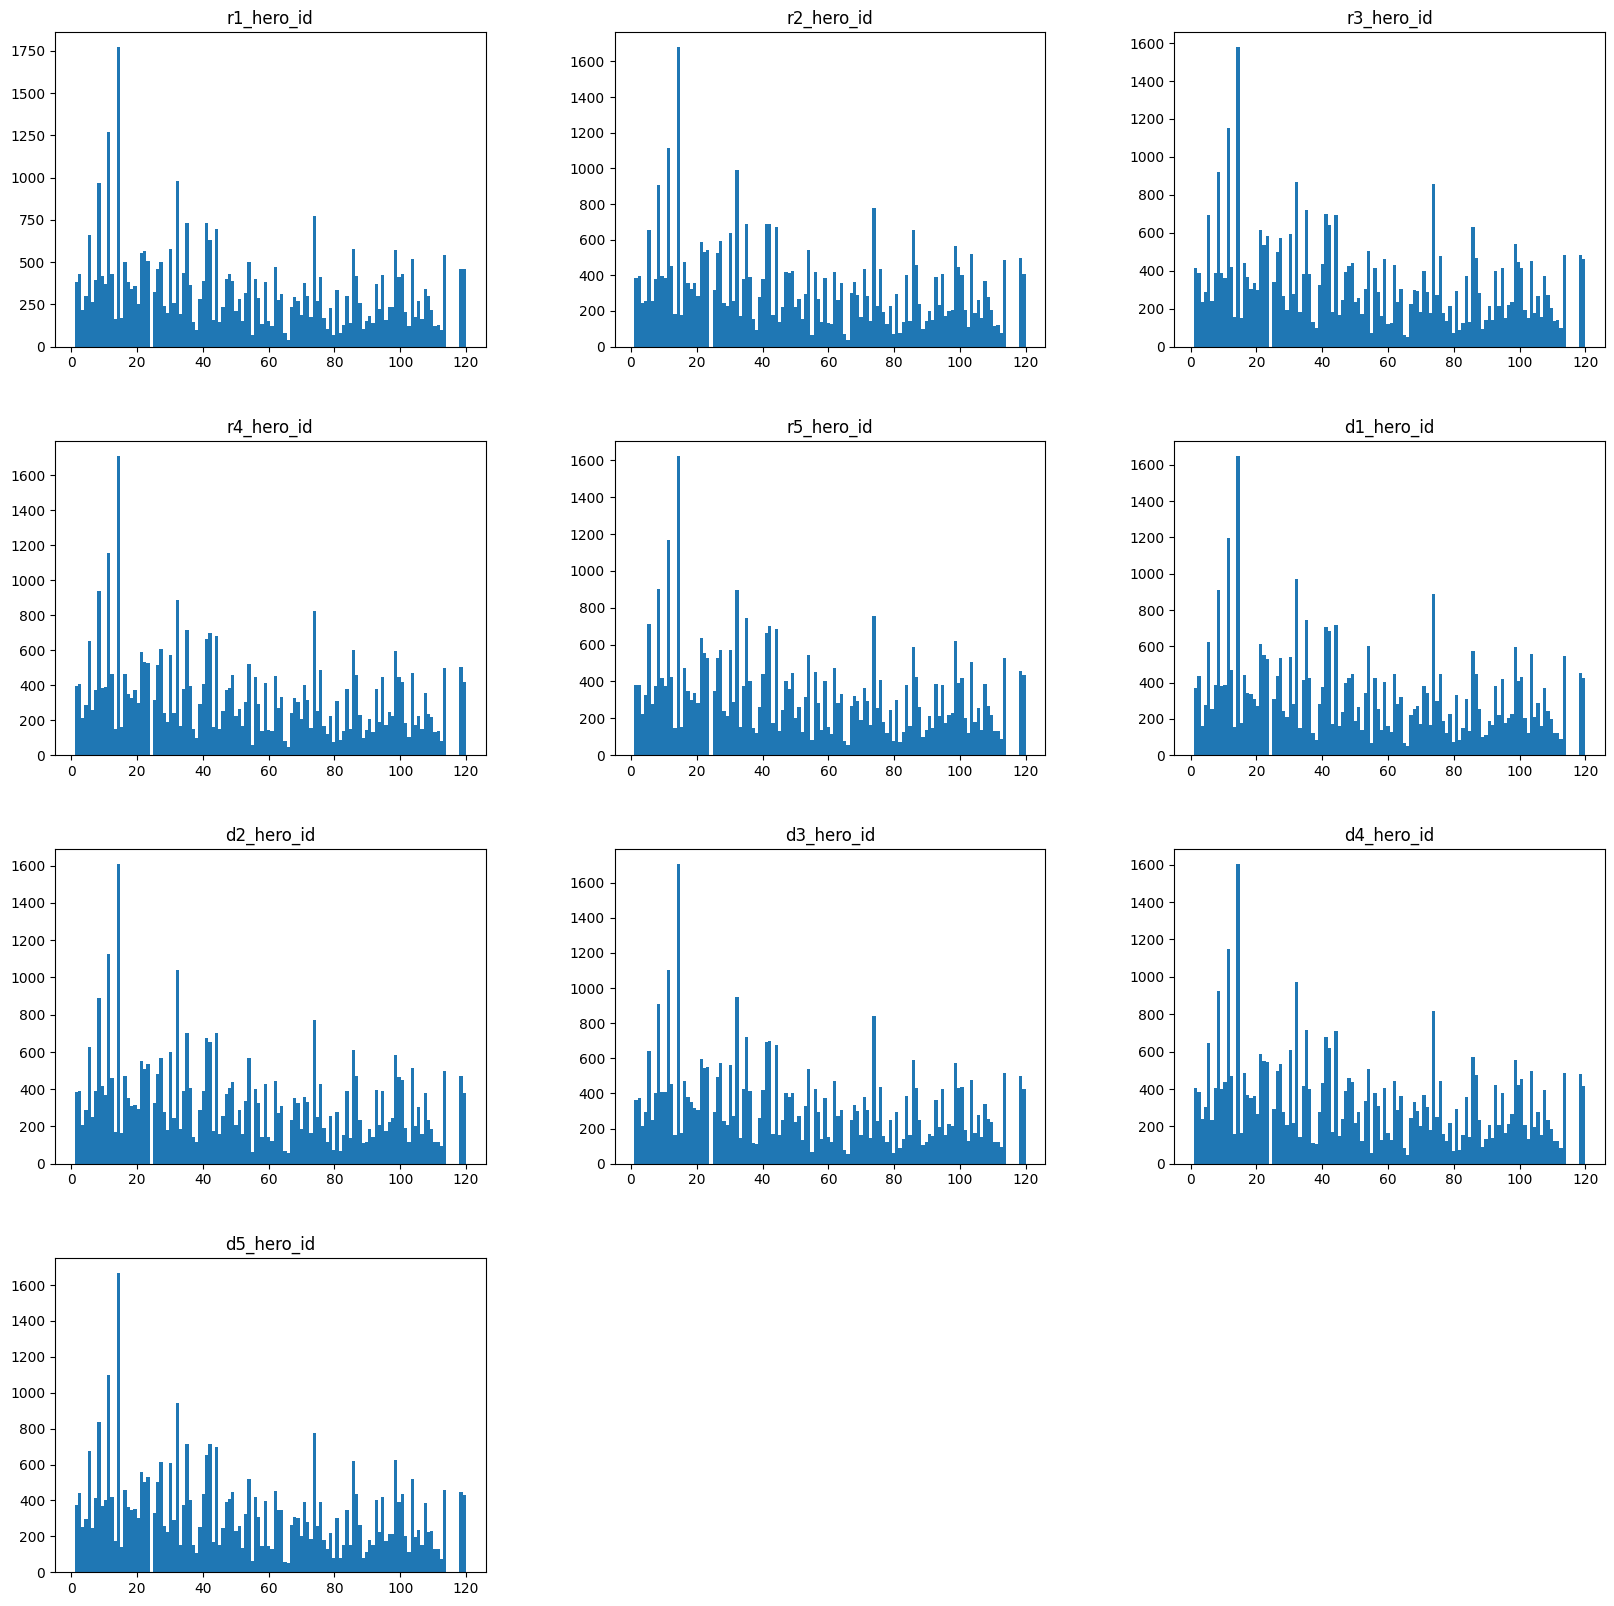

In [67]:
df[hero_id_labels].hist(
    figsize=(20,20),
    bins=120,
    grid=False
)